In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to extract revenue data from Yahoo Finance
def extract_revenue(symbol):
    url = f"https://finance.yahoo.com/quote/{symbol}/financials?p={symbol}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_tags = soup.find_all('div', class_='D(tbr)')
    if len(revenue_tags) >= 2:
        revenue_tag = revenue_tags[1].find_all('div', recursive=False)
        if len(revenue_tag) >= 2:
            revenue_span = revenue_tag[1].find_all('span')
            if len(revenue_span) >= 2:
                return revenue_span[1].text
    return None

# Extracting Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")

# Extracting Tesla revenue data
tesla_revenue = extract_revenue("TSLA")

# Extracting GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="max")

# Extracting GameStop revenue data
gamestop_revenue = extract_revenue("GME")

# Displaying the data
print("Tesla Stock Data:")
print(tesla_stock_data.head())
print("\nTesla Revenue:", tesla_revenue)

print("\nGameStop Stock Data:")
print(gamestop_stock_data.head())
print("\nGameStop Revenue:", gamestop_revenue)



Tesla Stock Data:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  

Tesla Revenue: None

GameStop Stock Data:
       

In [3]:
import yfinance as yf

# Extracting Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the dataframe to a CSV file
tesla_data.to_csv("tesla_stock_data.csv")

# Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup

def extract_revenue(symbol):
    url = f"https://finance.yahoo.com/quote/{symbol}/financials?p={symbol}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        revenue_tag = soup.find_all('div', class_='D(tbr)')[1].find_all('div', recursive=False)[1].find_all('span')[1].text
        return revenue_tag
    except IndexError:
        print("Error: Unable to extract revenue data. Check if the HTML structure has changed or if the class names are accurate.")
        return None

# Extracting Tesla revenue data
tesla_revenue = extract_revenue("TSLA")

if tesla_revenue is not None:
    # Display the last five rows of the dataframe
    print(tesla_revenue.tail())



Error: Unable to extract revenue data. Check if the HTML structure has changed or if the class names are accurate.


In [13]:
# Extracting GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="max")


print("\nGameStop Stock Data:")
print(gamestop_stock_data.head())


GameStop Stock Data:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [9]:
print("\nGameStop Revenue:", gamestop_revenue)


GameStop Revenue: None


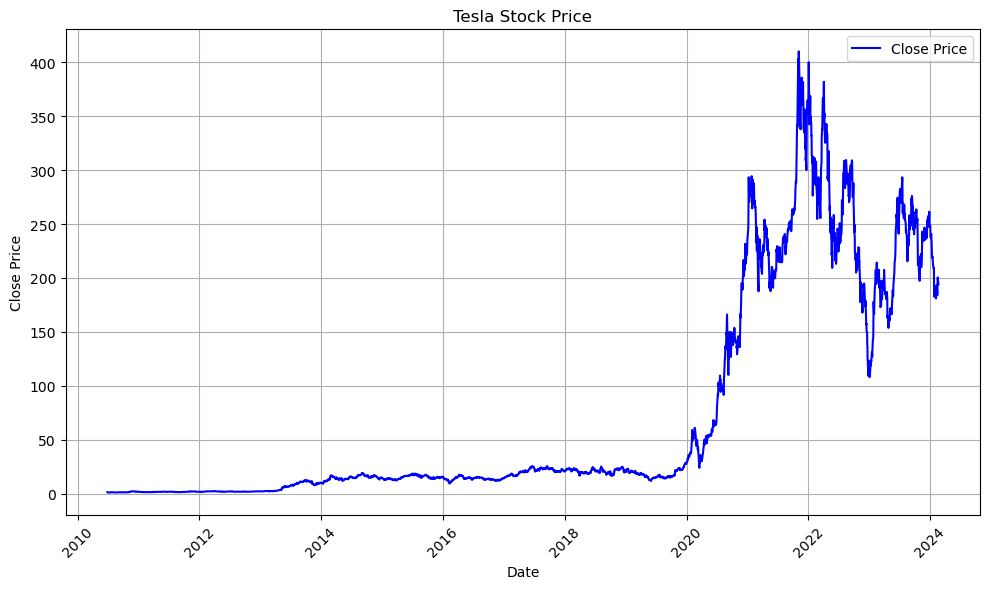

In [10]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot Tesla Stock Graph
make_graph(tesla_data, "Tesla Stock Price")


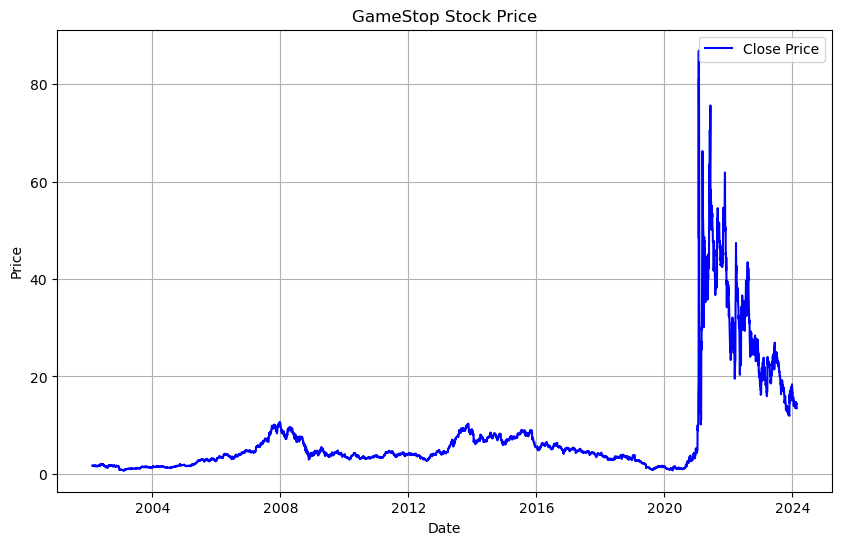

In [19]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gamestop_stock_data, "GameStop Stock Price")
